In [10]:
# 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False


### 目录

#### 一、子图

##### 1.1 使用 plt.subplots 绘制均匀状态下的子图
##### 1.2 使用 GridSpec 绘制非均匀子图

#### 二、子图上的方法

#### 三、作业

### 下面是正式的学习内容

#### 一、子图

##### 1.1 使用 plt.subplots 绘制均匀状态下的子图

plt.subplots创建画布上的子图后返回两个参数，一个是画布本身figure，一个是子图列表，可以通过索引对子图进行操作。

**主要参数说明：**

* figsize 参数可以指定整个画布的大小
* sharex 和 sharey 分别表示是否共享横轴和纵轴刻度


tight_layout函数可以调整子图的相对大小使字符不会重叠

Text(0.5, 1.05, '样例')

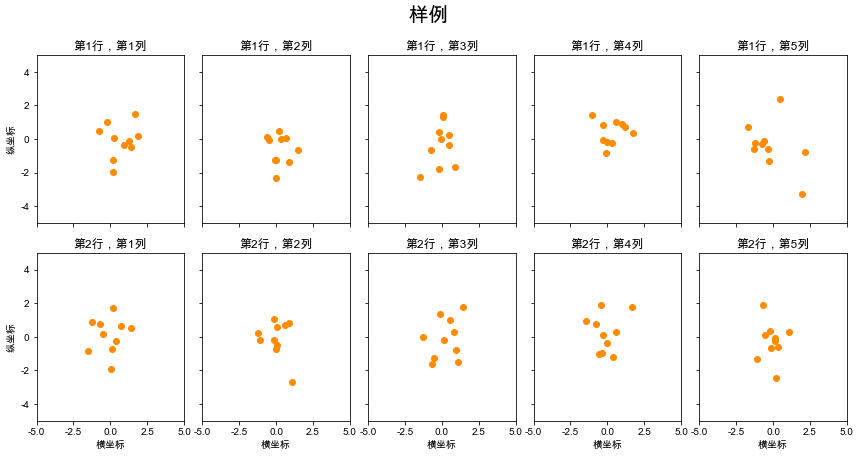

In [38]:
# 绘制2*5个散点子图

fig,axs = plt.subplots(2,5,
                       figsize=(12,6),
                       sharex =True,
                       sharey =True,)


# 
for i in range(2):
    for j in range(5):
        
        axs[i][j].scatter(np.random.randn(10),
                          np.random.randn(10),
                          c = 'darkorange')
        axs[i][j].set_title("第%d行，第%d列"%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: 
            axs[i][j].set_xlabel('横坐标')
        if j==0: 
            axs[i][j].set_ylabel('纵坐标')
           

        
        
#fig.suptitle('样例',size=20)        
fig.tight_layout()

# figure的标题和子图重合了怎么办

# 设置标题的坐标
fig.suptitle('样例',size=20,x=0.5,y=1.05)  

##### 1.2 使用 GridSpec 绘制非均匀子图

使用add_gridspec绘制非均匀子图

非均匀子图有两种含义：

* 每个子图的比例大小不同，但没有跨行和跨列

* 每个子图的比例大小不同，并且跨行和跨列了


利用 add_gridspec 可以指定相对宽度比例 width_ratios 和相对高度比例参数 height_ratios.

plt.add_subplots其实也可以实行非均匀子图的绘制。下面根据示例来学习。

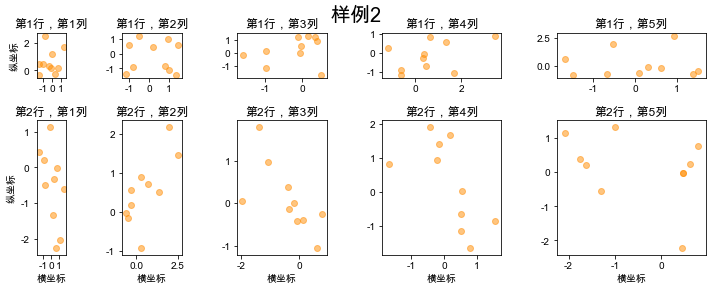

In [45]:
# 每个子图的比例大小不同，但没有跨行和跨列

fig = plt.figure(figsize=(10,4))
spec =fig.add_gridspec(nrows=2,
                 ncols=5,
                 width_ratios=[1,2,3,4,5],
                 height_ratios=[1,3])

#
for i in range(2):
    for j in range(5):
        
        ax = fig.add_subplot(spec[i,j])
        ax.scatter(np.random.randn(10), 
                   np.random.randn(10),
                   c = 'darkorange',
                   alpha = 0.5)
        
        ax.set_title('第%d行，第%d列'%(i+1,j+1))
        if i==1: ax.set_xlabel('横坐标')
        if j==0: ax.set_ylabel('纵坐标')


fig.suptitle('样例2', size=20,x=0.5,y=1.0)            
fig.tight_layout()

在上面的例子中出现了 spec[i, j] 的用法，事实上通过切片就可以实现子图的合并而达到跨图的共能

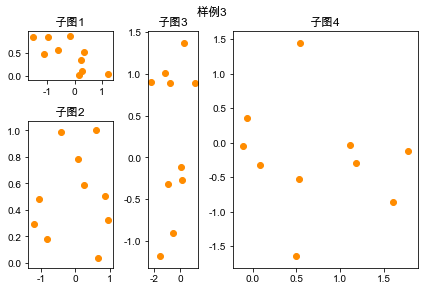

In [66]:
# 非均匀子图 实现跨行跨列

fig = plt.figure()
spec = fig.add_gridspec(nrows = 2,
                        height_ratios = [1,3],
                        ncols = 5,
                        width_ratios = [1,2,3,4,5],
                        )


# 切片合并

# 行子图合并
sep1 = fig.add_subplot(spec[0,:2])
sep1.scatter(np.random.randn(10),
            np.random.rand(10),
            c = 'darkorange')
sep1.set_title('子图1')
#
sep2 = fig.add_subplot(spec[1,:2])
sep2.scatter(np.random.randn(10),
            np.random.rand(10),
            c = 'darkorange')
sep2.set_title("子图2")


# 列子图合并
sep3 = fig.add_subplot(spec[:,2])
sep3.scatter(np.random.randn(10),
            np.random.randn(10),
            c='darkorange')
sep3.set_title("子图3")



# 行列子图合并
sep4 = fig.add_subplot(spec[:,3:])
sep4.scatter(np.random.randn(10),
            np.random.randn(10),
            c='darkorange')
sep4.set_title("子图4")




fig.suptitle("样例3",x = 0.5,y=1.0)
fig.tight_layout()

#### 二、子图上的方法

建立子图后，在子图上绘制图形的方法有

* 绘制直线   .plot
* 绘制直方图 .hist
* 绘制柱状图 .bar
* 绘制散点图 .scatter
* 绘制条形图 .barh
* 绘制扇形图 .pie

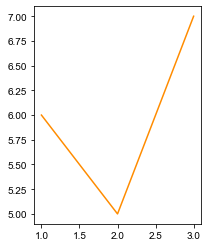

In [73]:
# 绘制直线

# 自动创建
fig = plt.figure(figsize=(3,4))

plt.plot([1,2,3],[6,5,7],color='darkorange')

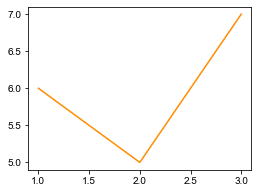

In [72]:
# 先建立子图，再绘制图像

fig,axs = plt.subplots(figsize=(4,3))

axs.plot([1,2,3],[6,5,7],color='darkorange')

(array([ 94.,  95., 108.,  99.,  93., 110.,  98., 104., 101.,  98.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

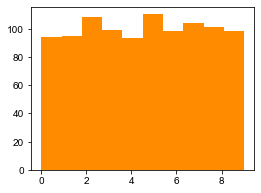

In [79]:
# 绘制直方图

fig,axs = plt.subplots(figsize=(4,3))
axs.hist(np.random.randint(0,10,1000),color='darkorange')

常用直线的绘制方法有：

* 水平直线 axhline(y=0, xmin=0, xmax=1)
* 垂直直线 axvline(x=0, ymin=0, ymax=1)
* 任意角度直线 axline

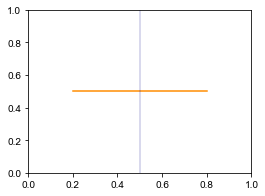

In [89]:
#

fig,axs = plt.subplots(figsize=(4,3))
axs.axhline(y=0.5,xmin=0.2,xmax=0.8,color='darkorange')
    
axs.axvline(x=0.5, ymin=0, ymax=1,color='darkblue',alpha=0.2)





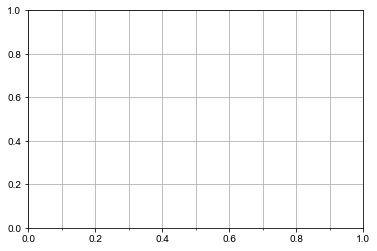

In [103]:
# 绘制网格

from matplotlib.ticker import  MultipleLocator


fig,axs = plt.subplots()
#axs.set_xscale("log")

#显示次刻度标签的位置,没有标签文本
xminorLocator = MultipleLocator(0.1) 
axs.xaxis.set_minor_locator(xminorLocator)


#
axs.grid(True,which ='both') 

#### 三、作业

1. 墨尔本1981年至1990年的每月温度情况

In [104]:
import pandas as pd

ex1 = pd.read_csv('./data/layout_ex1.csv')
ex1.head()

,Time,Temperature
0,1981-01,17.712903
1,1981-02,17.678571
2,1981-03,13.500000
3,1981-04,12.356667
4,1981-05,9.490323


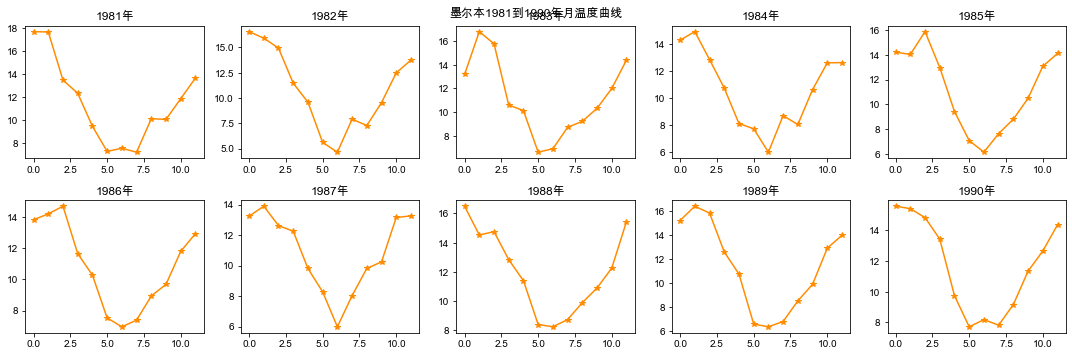

In [124]:
#
fig,axs = plt.subplots(2,5,figsize=(15,5))
fig.suptitle("墨尔本1981到1990年月温度曲线")
#
for i in range(2):
    for j in range(5):
        star_indx = (i*5+j)*12
        axs[i][j].plot(np.arange(12),
                       ex1['Temperature'][star_indx:star_indx+12],
                       color="darkorange",
                       marker = "*")
        axs[i][j].set_title("%d年"%(1981+i*5+j))
        
fig.tight_layout()